<a href="https://colab.research.google.com/github/aslla77/practice-Python/blob/main/2nd/06_XOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AND ,OR , NAND , XOR 문제를 만들어 볼 것이다.

전에 해봤기에 바로 혼자 작성한 코드부터

In [235]:
import numpy as np
import matplotlib.pyplot as plt


In [236]:
def numerical_derivative(f,x):
  delta=1e-4
  grads=np.zeros_like(x)
  it=np.nditer(x,flags=['multi_index'],op_flags=['readwrite'])

  while not it.finished:
    idx=it.multi_index
    tmp_value=x[idx]
    x[idx]=float(tmp_value)+delta
    fx1=f(x)

    x[idx]=tmp_value-delta
    fx2=f(x)

    grads[idx]=(fx1-fx2)/(2*delta)

    x[idx]=tmp_value
    it.iternext()
  return grads

def sigmoid(x):
  return 1/(1+np.exp(-x))

class find:
  def __init__(self, x,t):
    self.params={}
    self.params['W']=np.random.rand(2,1)
    self.params['b']=np.random.rand(1)
    self.x_data=x
    self.t_data=t

  def predict(self,x):
    W=self.params['W']
    b=self.params['b']
    a1=np.dot(x,W)+b
    y=sigmoid(a1)
    if y>=0.5:
      result=1
    else:
      result=0
    return y ,result

  def cee(self,x,t):
    delta1=1e-7
    W=self.params['W']
    b=self.params['b']
    a1=np.dot(x,W)+b
    y=sigmoid(a1)
    return -np.sum(t*np.log(y+delta1)+(1-t)*np.log(1-y+delta1))
    
    
  def error_value(self,x,t):
    delta=1e-7
    W=self.params['W']
    b=self.params['b']
    a1=x@W+b
    y=sigmoid(a1)
    return -np.sum(t*np.log(y+delta)+(1-t)*np.log(1-y+delta))
  
  def train(self):
    training_rate=1e-2

    f=lambda x: self.cee(self.x_data,self.t_data)

    for step in range(10001):
      for i in ['W','b']:
        self.params[i] -= training_rate * numerical_derivative(f,self.params[i])

      if step%2000==0:
        print('step:',step,'error value:',self.error_value(self.x_data,self.t_data),'\n','W:',self.params['W'],'\n','b:',self.params['b'])

#AND

In [237]:
x_data=np.array([[0,0],[1,0],[0,1],[1,1]]).reshape(4,2)
t_and=np.array([0,0,0,1]).reshape(4,1)
print(x_data.shape)
print(t_and.shape)

(4, 2)
(4, 1)


In [238]:
and_class=find(x_data,t_and)
and_class.train()
print('0,0:',and_class.predict(np.array([0,0])))
print('1,0:',and_class.predict(np.array([1,0])))
print('0,1:',and_class.predict(np.array([0,1])))
print('1,1:',and_class.predict(np.array([1,1])))


step: 0 error value: 3.3785169783553752 
 W: [[0.87666809]
 [0.15793828]] 
 b: [0.24002274]
step: 2000 error value: 0.6577819559111522 
 W: [[2.75164103]
 [2.73261754]] 
 b: [-4.3415283]
step: 4000 error value: 0.38937996185417517 
 W: [[3.86657924]
 [3.86466627]] 
 b: [-5.99642361]
step: 6000 error value: 0.27445092770321666 
 W: [[4.60186277]
 [4.60148999]] 
 b: [-7.09029483]
step: 8000 error value: 0.21098103045935912 
 W: [[5.14885668]
 [5.1487508 ]] 
 b: [-7.9059214]
step: 10000 error value: 0.17093572942825896 
 W: [[5.58342697]
 [5.58338876]] 
 b: [-8.55481807]
0,0: (array([0.00019258]), 0)
1,0: (array([0.04873519]), 0)
0,1: (array([0.04873342]), 0)
1,1: (array([0.93162975]), 1)


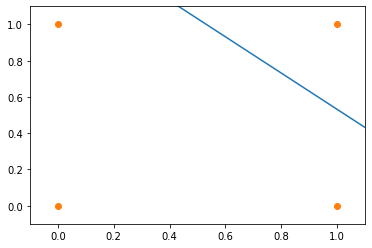

In [239]:
x=np.arange(0,1.3,0.05)
x_1=np.array([0,1,0,1])
y_1=np.array([0,0,1,1])
y=(and_class.params['W'][0]*x+and_class.params['b'])/(-1*and_class.params['W'][1])

plt.plot(x,y)
plt.plot(x_1,y_1,'o')
plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)
plt.show()

#OR

In [240]:
x_data=np.array([[0,0],[1,0],[0,1],[1,1]]).reshape(4,2)
t_or=np.array([0,1,1,1]).reshape(4,1)

In [241]:
or_class=find(x_data,t_or)
or_class.train()
print('0,0:',or_class.predict(np.array([0,0])))
print('1,0:',or_class.predict(np.array([1,0])))
print('0,1:',or_class.predict(np.array([0,1])))
print('1,1:',or_class.predict(np.array([1,1])))


step: 0 error value: 2.0564978965420178 
 W: [[0.11886065]
 [0.44805874]] 
 b: [0.40642209]
step: 2000 error value: 0.43279927160561177 
 W: [[3.60591048]
 [3.63787825]] 
 b: [-1.25098586]
step: 4000 error value: 0.23296624275666458 
 W: [[4.91879437]
 [4.92844885]] 
 b: [-1.95513707]
step: 6000 error value: 0.15727498781005225 
 W: [[5.73297981]
 [5.73742961]] 
 b: [-2.3780529]
step: 8000 error value: 0.11812406447031078 
 W: [[6.32014585]
 [6.32266836]] 
 b: [-2.67946168]
step: 10000 error value: 0.0943619968212668 
 W: [[6.77820125]
 [6.77981531]] 
 b: [-2.91313661]
0,0: (array([0.05150798]), 0)
1,0: (array([0.9794688]), 1)
0,1: (array([0.97950123]), 1)
1,1: (array([0.99997618]), 1)


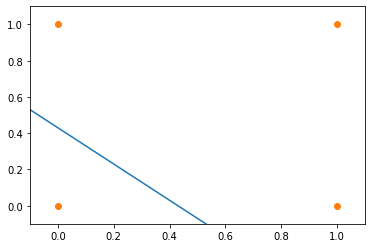

In [242]:
x=np.arange(-0.3,1.3,0.05)
x_1=np.array([0,1,0,1])
y_1=np.array([0,0,1,1])
y=(or_class.params['W'][0]*x+or_class.params['b'])/(-1*or_class.params['W'][1])

plt.plot(x,y)
plt.plot(x_1,y_1,'o')
plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)
plt.show()

#NAND

In [243]:
x_data=np.array([[0,0],[1,0],[0,1],[1,1]]).reshape(4,2)
t_nand=np.array([1,1,1,0]).reshape(4,1)

In [244]:
nand_class=find(x_data,t_nand)
nand_class.train()
print('0,0:',nand_class.predict(np.array([0,0])))
print('1,0:',nand_class.predict(np.array([1,0])))
print('0,1:',nand_class.predict(np.array([0,1])))
print('1,1:',nand_class.predict(np.array([1,1])))

step: 0 error value: 2.8218155034634 
 W: [[0.42394601]
 [0.58780742]] 
 b: [0.40791849]
step: 2000 error value: 0.6829229501899807 
 W: [[-2.66294839]
 [-2.6588005 ]] 
 b: [4.22301315]
step: 4000 error value: 0.3982770195033536 
 W: [[-3.81791388]
 [-3.81751695]] 
 b: [5.92541416]
step: 6000 error value: 0.27894638995634735 
 W: [[-4.56774876]
 [-4.56767343]] 
 b: [7.03972015]
step: 8000 error value: 0.21367003719023298 
 W: [[-5.12257726]
 [-5.1225562 ]] 
 b: [7.86677294]
step: 10000 error value: 0.1727159551356793 
 W: [[-5.56207871]
 [-5.56207119]] 
 b: [8.52294962]
0,0: (array([0.99980119]), 1)
1,0: (array([0.95077477]), 1)
0,1: (array([0.95077512]), 1)
1,1: (array([0.06906121]), 0)


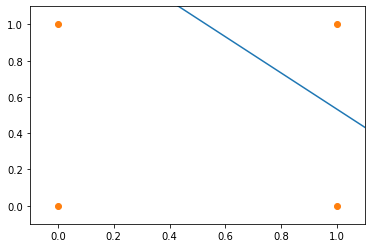

In [245]:
x=np.arange(0,1.3,0.05)
x_1=np.array([0,1,0,1])
y_1=np.array([0,0,1,1])
y=(nand_class.params['W'][0]*x+nand_class.params['b'])/(-1*nand_class.params['W'][1])

plt.plot(x,y)
plt.plot(x_1,y_1,'o')
plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)
plt.show()

#XOR

문제의 XOR 퍼셉트론이다 단일 레이터 형태로는 구분이 불가능 하여 다층 레이어를 설계해야한다.




In [246]:
x_data=np.array([[0,0],[1,0],[0,1],[1,1]]).reshape(4,2)
t_xor=np.array([0,1,1,0])

In [247]:
# NAND와 OR 실행후 나온 값을 AND로 확인 하면 XOR이 나온다.
for i in x_data:
  a1=nand_class.predict(i)
  a2=or_class.predict(i)
  y=and_class.predict(np.array([a1[1],a2[1]]))
  print(i,y)

[0 0] (array([0.04873519]), 0)
[1 0] (array([0.93162975]), 1)
[0 1] (array([0.93162975]), 1)
[1 1] (array([0.04873342]), 0)


In [248]:
x_data=np.array([[0,0],[1,0],[0,1],[1,1]]).reshape(4,2)
t_xor=np.array([0,1,1,0])

In [260]:
#NAND 4개를 이용한 함수

for i in x_data:
  a_1=nand_class.predict(i)
  a_2=nand_class.predict(np.array([i[0],a_1[1]]))
  a_3=nand_class.predict(np.array([i[1],a_1[1]]))
  y=nand_class.predict(np.array([a_2[1],a_3[1]]))
  print(i,y)

[0 0] (array([0.06906121]), 0)
[1 0] (array([0.95077512]), 1)
[0 1] (array([0.95077477]), 1)
[1 1] (array([0.06906121]), 0)


#밑에는 위와 다르게 직접 W를 계산 하도록 하는 식을 만들어 볼 것이다.

In [261]:
class find_xor:
  def __init__(self, x,t):
    self.params={}
    self.params['W1']=np.random.random(2,2)
    self.params['b1']=np.random.random(2)
    self.params['W2']=np.random.random(2,1)
    self.params['b2']=np.random.rand(1)
    self.x_data=x
    self.t_data=t

  def predict(self,x):
    W1=self.params['W1']
    b1=self.params['b1']
    W2=self.params['W2']
    b2=self.params['b2']
    a1=np.dot(x,W1)+b1
    z1=sigmoid(a1)
    a3=np.dot(z1,W2)+b2
    y=sigmoid(a3)
    if y>=0.5:
      result=1
    else:
      result=0
    return y ,result

  def cee(self,x,t):
    delta1=1e-6
    W1=self.params['W1']
    b1=self.params['b1']
    W2=self.params['W2']
    b2=self.params['b2']
    a1=np.dot(x,W1)+b1
    z1=sigmoid(a1)
    a3=np.dot(z1,W2)+b2
    y=sigmoid(a3)
    return -np.sum(t*np.log(y+delta1)+(1-t)*np.log(1-y+delta1))
    
    
  def error_value(self,x,t):
    delta=1e-6
    W1=self.params['W1']
    b1=self.params['b1']
    W2=self.params['W2']
    b2=self.params['b2']
    a1=np.dot(x,W1)+b1
    z1=sigmoid(a1)
    a3=np.dot(z1,W2)+b2
    y=sigmoid(a3)
    return -np.sum(t*np.log(y+delta)+(1-t)*np.log(1-y+delta))
  
  def train(self):
    training_rate=1e-4

    f=lambda x: self.cee(self.x_data,self.t_data)

    for step in range(10001):
      for i in ['W1','b1','W2','b2']:
        self.params[i] -= training_rate * numerical_derivative(f,self.params[i])

      if step%2000==0:
        print('\nstep:',step,'error value:',self.error_value(self.x_data,self.t_data),'\n')
        for idx in ['W1','b1','W2','b2']:
          print('{0:}={1:}'.format(idx,self.params[idx]))

In [ ]:
x_data=np.array([[0,0],[1,0],[0,1],[1,1]]).reshape(4,2)
t_xor=np.array([0,1,1,0])

In [ ]:
xor_class=find_xor(x_data,t_xor)
xor_class.train()

print('0,0:',xor_class.predict(np.array([0,0])))
print('1,0:',xor_class.predict(np.array([1,0])))
print('0,1:',xor_class.predict(np.array([0,1])))
print('1,1:',xor_class.predict(np.array([1,1])))